In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from networkx.algorithms.shortest_paths.generic import has_path

In [3]:
df_links = pd.read_excel("scigrid-conference-eu-data-only/links_eu_power_160718.csvdata.xlsx")
df_nodes = pd.read_excel("scigrid-conference-eu-data-only/vertices_eu_power_160718.csvdata.xlsx")

edges = df_links[["v_id_1", "v_id_2"]].apply(lambda x: (x[0], x[1]), axis=1).to_list()
G = nx.from_edgelist(edges)

In [4]:
fig = px.scatter_geo(df_nodes,
                lat=df_nodes.lat,
                lon=df_nodes.lon,
                hover_name="v_id")

fig.update_geos(
    center=dict(lon=df_nodes.lon.median(), lat=df_nodes.lat.median()),
#     projection_rotation=dict(lon=30, lat=30, roll=30),
    lataxis_range=[-15,15], lonaxis_range=[50, 100]
)
fig.show()

In [ ]:
print("\n### NAJBARDZIEJ CENTRALNY WĘZEŁ ###")
node_max_value = max(nx.betweenness_centrality(G), key=(nx.betweenness_centrality(G)).get)
max_value = nx.betweenness_centrality(G).get(node_max_value)
print("Najbardziej centralny węzeł: " + str(node_max_value))
print("Pośrednictwo węzła: %.3f" % max_value)
print("\n### NAJMNIEJ CENTRALNY WĘZEŁ ###")
node_min_value = min(nx.betweenness_centrality(G), key=(nx.betweenness_centrality(G)).get)
min_value = nx.betweenness_centrality(G).get(node_min_value)
print("Najbardziej centralny węzeł: " + str(node_min_value))
print("Pośrednictwo węzła: %.3f" % min_value)
print("\n### KOMPONENTY ###")
print("Ilość komponentów: " + str(nx.number_connected_components(G)))
# print("\n### ŚREDNICA ###")
# print("Średnica grafu: " + str(nx.diameter(G)))


### NAJBARDZIEJ CENTRALNY WĘZEŁ ###
Najbardziej centralny węzeł: 69
Pośrednictwo węzła: 0.236

### NAJMNIEJ CENTRALNY WĘZEŁ ###
Najbardziej centralny węzeł: 1
Pośrednictwo węzła: 0.000

### KOMPONENTY ###
Ilość komponentów: 66


In [ ]:
print("### HISTOGRAM STOPNI WĘZŁÓW ###\n")
fig = px.histogram(dict(G.degree).values())
fig.update_layout(
    title="Degree Distribution",
    xaxis_title="Degree",
)

fig.show()

print("\n### HISTOGRAM POŚREDNICTWA ###")
betweenness = list(nx.betweenness_centrality(G).values())
fig = px.histogram(betweenness)
fig.update_layout(
    title="Betweenness Distribution",
    xaxis_title="betweenness_centrality",
)

fig.show()

print("\n### HISTOGRAM BLISKOŚCI ###")
closeness = list(nx.closeness_centrality(G).values())
fig = px.histogram(closeness)
fig.update_layout(
    title="Closeness Distribution",
    xaxis_title="closeness_centrality",
)

fig.show()

print("\n### HISTOGRAM WSPÓŁCZYNNIKA GRUPOWANIA ###")
clustering = list(nx.clustering(G).values())
fig = px.histogram(clustering)
fig.update_layout(
    title="Clustering Distribution",
    xaxis_title="Clustering coefficient",
)

fig.show()

print("\n### HISTOGRAM NAJKRÓTSZYCH ŚCIEŻEK ###")
nodelist = list(G.nodes)
short_path = []
for i in nodelist:
    for j in nodelist:
      if has_path(G,i,j):
        short_path.append(nx.shortest_path_length(G, i, j))
      # else:
      #   short_path.append(0)
fig = px.histogram(short_path)
fig.update_layout(
    title="Shortest Path Distribution",
    xaxis_title="shortest_path_length",
)

fig.show()

### HISTOGRAM STOPNI WĘZŁÓW ###




### HISTOGRAM POŚREDNICTWA ###



### HISTOGRAM BLISKOŚCI ###



### HISTOGRAM WSPÓŁCZYNNIKA GRUPOWANIA ###



### HISTOGRAM NAJKRÓTSZYCH ŚCIEŻEK ###


In [6]:
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import greedy_modularity_communities
communities = girvan_newman(G)
 
node_groups = []
for com in next(communities):
  node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green') 

fig = px.scatter_geo(df_nodes,
                lat=df_nodes.lat,
                lon=df_nodes.lon,
                color=color_map,
                hover_name="v_id")

fig.update_geos(
    center=dict(lon=df_nodes.lon.median(), lat=df_nodes.lat.median()),
#     projection_rotation=dict(lon=30, lat=30, roll=30),
    lataxis_range=[-15,15], lonaxis_range=[50, 100]
)
fig.show()

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 2

In [7]:
communities = sorted(greedy_modularity_communities(G), key=len, reverse=True)
print(f"Sieć ma {len(communities)} grup.")

Sieć ma 85 grup.


In [8]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            G.nodes[v]['community'] = c + 1
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [9]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

In [11]:
fig = px.scatter_geo(df_nodes,
                lat=df_nodes.lat,
                lon=df_nodes.lon,
                color=node_color,
                hover_name="v_id")

fig.update_geos(
    center=dict(lon=df_nodes.lon.median(), lat=df_nodes.lat.median()),
#     projection_rotation=dict(lon=30, lat=30, roll=30),
    lataxis_range=[-15,15], lonaxis_range=[50, 100]
)
fig.show()

In [ ]:
!pip install graph_tiger

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for graph_tiger: filename=graph_tiger-0.2.5-py3-none-any.whl size=38744 sha256=93a19de3a507fef65f90f719f7d4bdd3f27a004be8f8227c3ceef180d23e3264
  Stored in directory: /root/.cache/pip/wheels/cd/d0/60/9d4b9373e3e6fbb6b2953e126640f13503ddb6f4d3766698cb
Successfully built graph_tiger


In [ ]:
from graph_tiger.measures import run_measure
from graph_tiger.graphs import graph_loader

avg_vertex_betweenness = run_measure(G, measure='average_vertex_betweenness')
print("Average vertex betweenness:", avg_vertex_betweenness)
avg_vertex_betweenness = run_measure(G, measure='average_edge_betweenness')
print("Average edge betweenness:", avg_vertex_betweenness)

Average vertex betweenness: 7515.81
Average edge betweenness: 5738.06


In [ ]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

if __name__ == '__main__':

   # compare 2 measures based on graph connectivity
   measures_graph = [
     'average_vertex_betweenness',
     'average_edge_betweenness',
     'average_vertex_betweenness_approx',
     'average_edge_betweenness_approx'
   ]

   # graph params
   n = len(G.nodes())  # number of graph nodes
   start = 5  # k = 5
   step = 10  # k += 10

In [ ]:
def run_analysis(graph, n, runs, k_start, k_step, measures):
   from graph_tiger.graphs import graph_loader

   graphs = graph

   approx_results = []
   k_values = list(range(k_start, n, k_step)) + [np.inf]
   results = []
   for k in tqdm(k_values):
      r = run(graphs, measures, k=k)
      results.append(r)

   return np.stack(results)



def run(graph, measures, k):
   result = []

   for measure in measures:
      if '_approx' in measure:
         measure = measure.replace('_approx', '')
         r = run_measure(graph=graph, measure=measure, k=k)
      else:
         r = run_measure(graph=graph, measure=measure)

      result.append(r)

   return result

In [ ]:
def plot_results(x_data, results, result_type, measures, n, start, step):
   num_measures = int(len(measures) / 2)
   fig, axes = plt.subplots(ncols=num_measures, figsize=(num_measures*6 - 1, 5))

   for index, metric_name in enumerate(measures):
      if index == num_measures:
         break

      error = np.round(np.abs(results[:, num_measures + index] - results[:, index]), 2)
      axes[index].plot(x_data, error, label=metric_name)

      axes[index].set_title(metric_name)
      axes[index].set_xlabel('k')
      axes[index].set_ylabel('Error')

      if metric_name == 'number_spanning_trees':
         axes[index].set_yscale('log')

   plt.legend(loc="upper right")

   save_dir = os.getcwd() + '/plots/'
   os.makedirs(save_dir, exist_ok=True)
   plt.savefig(save_dir + 'approximation_{}_n={},start={},step={}.pdf'.format(result_type, n, start, step))
   plt.show()

100%|██████████| 148/148 [40:46<00:00, 16.53s/it]


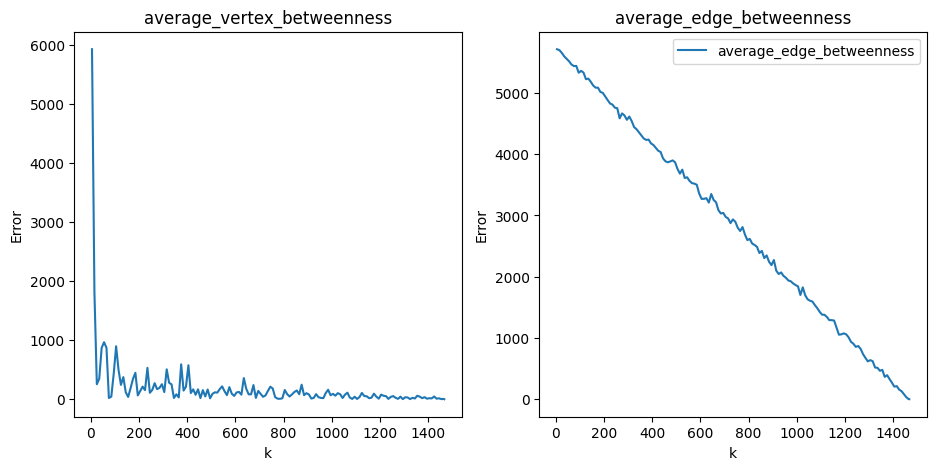

In [ ]:
graph_results = run_analysis(graph = G, n=n, runs=30, k_start=start, k_step=step, measures=measures_graph)
x_data = list(range(start, n, step)) + [len(G.nodes())]
plot_results(x_data, graph_results, "graph", measures_graph, n, start, step)